In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# download datasets

download related work datasets
http://www.ccs.neu.edu/home/luwang/datasets/microblog_conversation.zip

extract it to ~/data/

In [4]:
!ls ~/data/microblog_conversation

TREC.data               US_Election.data        conversation_README.txt


In [6]:
!head ~/data/microblog_conversation/TREC.data

In [7]:
data_dir= '~/data/microblog_conversation'

In [15]:
cols = ['conv_id' , 'id', 'reply_to_id']
path = os.path.join(data_dir, 'Trec.data')
ds = pd.read_csv(path, sep='\t', skiprows=1, names=cols, dtype=object)
ds.shape

((38999, 3), (22092, 3))

lets check the number of tweets

In [17]:
ds.id.nunique()

(38999, 22092)

lets check the number of conversations

In [20]:
ds.conv_id.nunique()

7500

we needed to collect the tweets since the original datasets only have ids, the merge and filter the conversations with missing tweets

In [21]:
data_dir= '~/data/twconv/trec'

In [30]:
path = os.path.join(data_dir, 'tweets_conv.csv')
ds = pd.read_csv(path, dtype=object,parse_dates=['timestamp'])
ds.shape

(29568, 14)

number of conversations after filtering missing tweets, some tweets have been deleted or not available due the user goes protected

In [35]:
ds.conversation_id.nunique()

5765

also it's important to know the period in which the tweets were posted to know if there is a bias to certain users/events

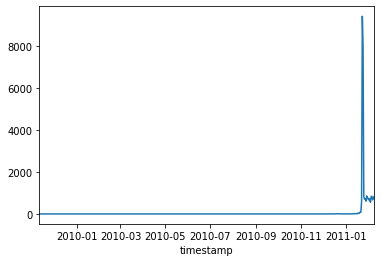

In [33]:
ds.groupby(ds.timestamp.dt.date).size().plot()

the trec dataset seems to be focused on a specific period or year

another issue, is to know if users have more than one tweet for evaluation purposes 

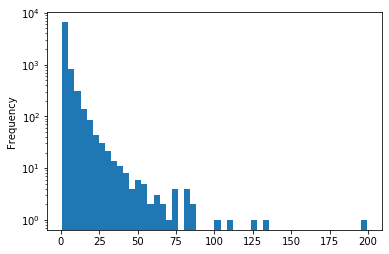

In [37]:
ds.groupby('screen_name').size().plot.hist(bins=50)
plt.yscale('log')

In [47]:
tweets_user = ds.groupby('screen_name').size()
tweets_user = tweets_user.reset_index()
tweets_user.columns = ['screen_name', 'num_tweets']
tweets_user.groupby('num_tweets').size().head()


num_tweets
1    3694
2    1517
3     825
4     527
5     295
dtype: int64

the evaluation must be focus on users with more than one tweets, so we have at least one tweet that indicates its  preferences

next, we need to define the hyperparams for the length of the context and the profiles, this is based on the number of words.  we should base on the tokenized splits

In [8]:
data_dir= '~/data/twconv/trec/staggingdata'

In [9]:
path = os.path.join(data_dir, 'train.csv')
ds = pd.read_csv(path, dtype=object)
ds.shape

(35254, 3)

In [10]:
ds['context_nw'] = ds.context.apply(lambda x: len(x.split()))

Text(0, 0.5, 'log')

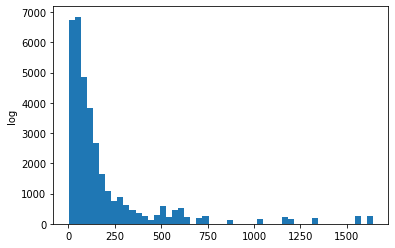

In [11]:
ds.context_nw.plot.hist(bins=50)
plt.ylabel('log')

since there are some very long context (outliers) we need to take a percentil

In [30]:
np.percentile(ds.context_nw, 70)

159.0

it seems for context the length could be 75% ~ 194

lets check for profiles

In [20]:
ds['profile_nw'] = ds.profile.apply(lambda x: len(x.split()))

Text(0, 0.5, 'log')

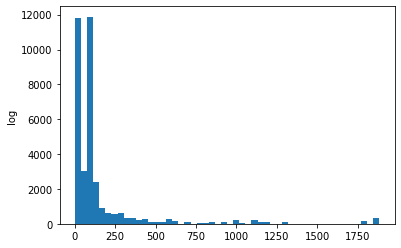

In [23]:
ds.profile_nw.plot.hist(bins=50)
plt.ylabel('log')

the same: since there are some very long profiles (outliers) we need to take a percentil

In [27]:
np.percentile(ds.profile_nw, 70)

87.0